In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.5,),
        (0.5,)
        # (0.485, 0.456, 0.406), 
        # (0.229, 0.224, 0.225)
        ),   
])

train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
    )
train_loader = DataLoader(
    train_dataset, 
    batch_size=64,
    shuffle=True
    )


In [9]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(100, 256),  # 입력 차원이 100이고 출력 차원이 256인 선형 레이어를 정의
            nn.LeakyReLU(0.2), # ??? LeakyReLU는 입력이 음수일 때 일정한 기울기를 가지는 ReLU
            nn.Linear(256, 512), # 이전 레이어의 출력 차원이 256이고 출력 차원이 512인 선형 레이어를 정의
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 28*28),
            nn.Tanh() # ?? Tanh 함수는 입력 값을 -1과 1 사이의 값으로 정규화
        )

    def forward(self, x): # ?? 모델의 입력에서 출력을 계산하는 데 사용
        return self.model(x).view(-1, 1, 28, 28)
    
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024), # 이미지 크기 24x24 
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3), # Dropout은 신경망의 과적합을 방지하기 위해 무작위로 일부 뉴런을 비활성화하는 기법입니다. 여기서는 30%의 확률로 뉴런을 비활성화
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid() # ?? Sigmoid 함수는 출력을 0과 1 사이로 압축하여 이진 분류를 위한 확률 값을 생성
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        return self.model(x)

In [11]:
generator = Generator()
discriminator = Discriminator()

criterion = nn.BCELoss() # 손실 함수인 이진 교차 엔트로피 손실(Binary Cross Entropy Loss)을 정의
optimizer_g = optim.Adam(generator.parameters(), lr=0.0002) #  Adam 옵티마이저를 생성합니다. Adam은 경사 하강법 알고리즘 중 하나로, 모델을 학습
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0002) # ? 왜 0.0002

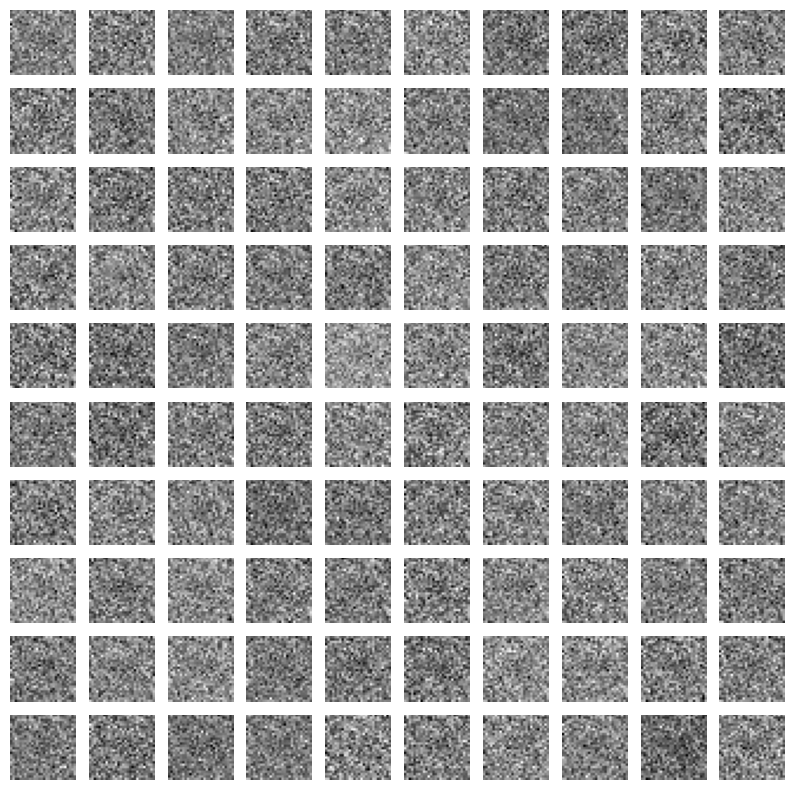

In [12]:

noise = torch.randn(100, 100) 
fake_images = generator(noise)
fake_images = fake_images.reshape(fake_images.size(0), 28, 28) 
fake_images = fake_images.detach().numpy() 

plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(fake_images[i], cmap='gray')
    plt.axis('off')
plt.show()
